In [33]:
import numpy as np
import sunpy
import sunpy.map
from sunpy.coordinates import propagate_with_solar_surface
from sunkit_image import coalignment
import astropy
import astropy.units as u
import astropy.constants as const
from astropy.coordinates import SkyCoord
from astropy.visualization import (ImageNormalize, AsinhStretch,
                                  PercentileInterval, LinearStretch)
from astropy.visualization.wcsaxes import SphericalCircle
from matplotlib.patches import Circle
from mpl_toolkits.axes_grid1.anchored_artists import (AuxTransformBox,
                                                      AnchoredOffsetbox,
                                                      TextArea,
                                                      VPacker)
from skimage.filters import sobel 
from regions import PolygonSkyRegion

import matplotlib.pyplot as plt
from glob import glob
import os
from sun_blinker import SunBlinker
import cmcrameri.cm as cmcm

In [2]:
saffron_dir = '../../src/SPICE/slimane/solo_L2.5_spice-n-ras_20221024T231535_V07_150995398-000/con-06/'

In [3]:
saffron_NeVIII_con06_file = glob(os.path.join(saffron_dir, '*770.42-ne_8*.fits'))[0]
saffron_OIII_con06_files = glob(os.path.join(saffron_dir, '*o_3*.fits'))
saffron_NIV_con06_file = glob(os.path.join(saffron_dir, '*765.15-n_4*.fits'))[0]
saffron_OIV_con06_file = glob(os.path.join(saffron_dir, '*787.72-o_4*.fits'))[0]
saffron_SV_con06_file = glob(os.path.join(saffron_dir, '*786.47-s_5*.fits'))[0]
saffron_NIII_con06_files = glob(os.path.join(saffron_dir, '*n_3*.fits'))
saffron_MgIX_con06_file = glob(os.path.join(saffron_dir, '*706.02-mg_9*.fits'))[0]

In [4]:
saffron_NeVIII_con06_maps = sunpy.map.Map(saffron_NeVIII_con06_file)
saffron_NeVIII_con06_intensity_map = saffron_NeVIII_con06_maps[0]
saffron_NeVIII_con06_intensity_map = saffron_NeVIII_con06_intensity_map.submap([0,120]*u.pix,
                                                                                top_right=[192,699]*u.pix)

saffron_OIII_intensity = []
for file_ in saffron_OIII_con06_files:
    saffron_OIII_con06_maps = sunpy.map.Map(file_)
    saffron_OIII_intensity.append(saffron_OIII_con06_maps[0].data)
saffron_OIII_con06_intensity_map = sunpy.map.Map(np.nansum(saffron_OIII_intensity, axis=0),
                                                  saffron_OIII_con06_maps[0].meta)
saffron_OIII_con06_intensity_map = saffron_OIII_con06_intensity_map.submap([0,120]*u.pix,
                                                                            top_right=[192,699]*u.pix)

saffron_NIV_con06_maps = sunpy.map.Map(saffron_NIV_con06_file)
saffron_NIV_con06_intensity_map = saffron_NIV_con06_maps[0]
saffron_NIV_con06_intensity_map = saffron_NIV_con06_intensity_map.submap([0,120]*u.pix,
                                                                            top_right=[192,699]*u.pix)

saffron_OIV_con06_maps = sunpy.map.Map(saffron_OIV_con06_file)
saffron_OIV_con06_intensity_map = saffron_OIV_con06_maps[0]
saffron_OIV_con06_intensity_map = saffron_OIV_con06_intensity_map.submap([0,120]*u.pix,
                                                                            top_right=[192,699]*u.pix)

saffron_SV_con06_maps = sunpy.map.Map(saffron_SV_con06_file)
saffron_SV_con06_intensity_map = saffron_SV_con06_maps[0]
saffron_SV_con06_intensity_map = saffron_SV_con06_intensity_map.submap([0,120]*u.pix,
                                                                        top_right=[192,699]*u.pix)

saffron_NIII_intensity = []
for file_ in saffron_NIII_con06_files:
    saffron_NIII_con06_maps = sunpy.map.Map(file_)
    saffron_NIII_intensity.append(saffron_NIII_con06_maps[0].data)
saffron_NIII_con06_intensity_map = sunpy.map.Map(np.nansum(saffron_NIII_intensity, axis=0), 
                                                 saffron_NIII_con06_maps[0].meta)
saffron_NIII_con06_intensity_map = saffron_NIII_con06_intensity_map.submap([0,120]*u.pix,
                                                                            top_right=[192,699]*u.pix)

saffron_MgIX_con06_maps = sunpy.map.Map(saffron_MgIX_con06_file)
saffron_MgIX_con06_intensity_map = saffron_MgIX_con06_maps[0]
saffron_MgIX_con06_intensity_map = saffron_MgIX_con06_intensity_map.submap([0,120]*u.pix,
                                                                            top_right=[192,699]*u.pix)

saffron_spice_NeVIII_vel_map_data = saffron_NeVIII_con06_maps[1].data
saffron_spice_NeVIII_vel_map_data = (saffron_spice_NeVIII_vel_map_data/np.nanmedian(saffron_spice_NeVIII_vel_map_data) - 1)*const.c.to_value(u.km/u.s)
saffron_spice_NeVIII_vel_map_data = saffron_spice_NeVIII_vel_map_data - np.nanmedian(saffron_spice_NeVIII_vel_map_data[120:699,:], axis=0)
saffron_NeVIII_con06_velocity_map = sunpy.map.Map(saffron_spice_NeVIII_vel_map_data, saffron_NeVIII_con06_maps[1].meta)
saffron_NeVIII_con06_velocity_map.meta['bunit'] = 'km/s'

saffron_NIV_vel_map_data = saffron_NIV_con06_maps[1].data
saffron_NIV_vel_map_data = (saffron_NIV_vel_map_data/np.nanmedian(saffron_NIV_vel_map_data) - 1)*const.c.to_value(u.km/u.s)
saffron_NIV_vel_map_data = saffron_NIV_vel_map_data - np.nanmedian(saffron_NIV_vel_map_data[120:699,:], axis=0)
saffron_NIV_con06_velocity_map = sunpy.map.Map(saffron_NIV_vel_map_data, saffron_NIV_con06_maps[1].meta)
saffron_NIV_con06_velocity_map.meta['bunit'] = 'km/s'


for maps in (saffron_NeVIII_con06_intensity_map, saffron_OIII_con06_intensity_map, 
             saffron_NIV_con06_intensity_map, saffron_OIV_con06_intensity_map, 
             saffron_SV_con06_intensity_map, saffron_NIII_con06_intensity_map, saffron_MgIX_con06_intensity_map):
    # maps = maps.submap([0,120]*u.pix, top_right=[192,699]*u.pix)
    maps.plot_settings['aspect'] = maps.scale.axis2/maps.scale.axis1
    maps.plot_settings['norm'] = ImageNormalize(vmin=np.nanpercentile(maps.data, 0.2),
                                                vmax=np.nanpercentile(maps.data, 99.8),
                                                stretch=AsinhStretch())

saffron_NeVIII_con06_velocity_map = saffron_NeVIII_con06_velocity_map.submap([0,120]*u.pix, top_right=[192,699]*u.pix)
saffron_NeVIII_con06_velocity_map.plot_settings['aspect'] = saffron_NeVIII_con06_velocity_map.scale.axis2/saffron_NeVIII_con06_velocity_map.scale.axis1
saffron_NeVIII_con06_velocity_map.plot_settings['norm'] = ImageNormalize(vmin=-40,vmax=40)
saffron_NeVIII_con06_velocity_map.plot_settings['cmap'] = 'coolwarm'



In [5]:
def add_psf_scale_circle(ax, text, size, font_color='black', edgecolor='white', facecolor='none',
                          fontsize=12, spherical_circle=True, loc='upper right', **kwargs):
    
    circle_box = AuxTransformBox(ax.get_transform('world'))

    if spherical_circle:
        circle = SphericalCircle((0, 0), size, transform=ax.get_transform('world'),
                                 edgecolor=edgecolor, facecolor=facecolor, **kwargs)
    else:
        circle = Circle((0, 0), size, transform=ax.get_transform('world'),
                        edgecolor=edgecolor, facecolor=facecolor, **kwargs)

    circle_box.add_artist(circle)

    text_box = TextArea(text, textprops=dict(color=font_color, fontsize=fontsize))

    packer = VPacker(children=[text_box, circle_box],align='center', pad=0, sep=5)
    
    ax.add_artist(AnchoredOffsetbox(child=packer, loc=loc, frameon=False,
                                    pad=0.1,borderpad=0.5))




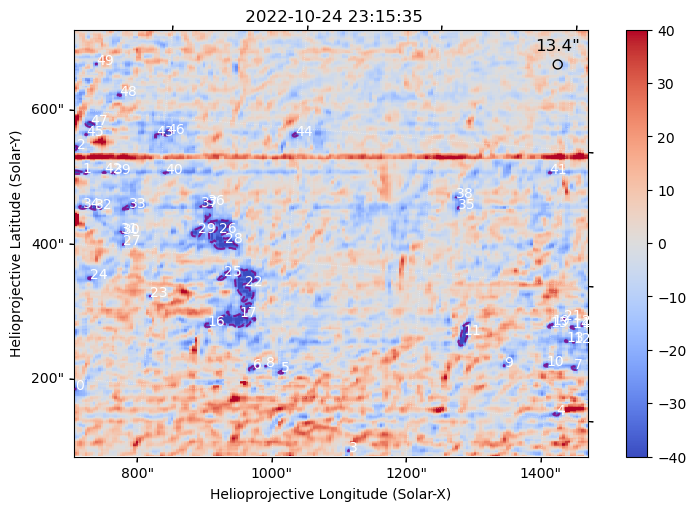

In [6]:
fig = plt.figure(figsize=(7, 5),layout='constrained')
ax = fig.add_subplot(111, projection=saffron_NeVIII_con06_velocity_map)
saffron_NeVIII_con06_velocity_map.plot(axes=ax)

cs = saffron_NeVIII_con06_velocity_map.draw_contours(levels=[-30,]*saffron_NeVIII_con06_velocity_map.unit,colors=["purple"],axes=ax,alpha=0.8)
plt.colorbar()

for ii, seg in enumerate(cs.allsegs[0]):
    ax.text(np.nanmean(seg, axis=0)[0], np.nanmean(seg, axis=0)[1], f'{ii}', color='white', fontsize=10)

add_psf_scale_circle(ax, '13.4"', (6.7*u.arcsec).to(u.deg), spherical_circle=True, edgecolor='black', facecolor='none', fontsize=12, loc='upper right')

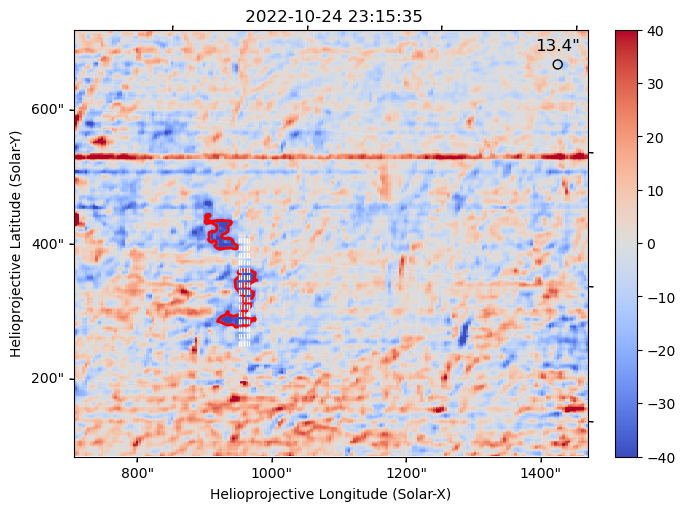

In [73]:
cs_selected_index = [17,22,26]
    
fig = plt.figure(figsize=(7, 5),layout='constrained')
ax = fig.add_subplot(111, projection=saffron_NeVIII_con06_velocity_map)
saffron_NeVIII_con06_velocity_map.plot(axes=ax)
plt.colorbar()

for ii in cs_selected_index:
    ax.plot(*cs.allsegs[0][ii].T, color='red', lw=2)

ax.plot([63,63],[150,300],color='white', ls='--', lw=1)
ax.plot([62,62],[150,300],color='white', ls='--', lw=1)
ax.plot([61,61],[150,300],color='white', ls='--', lw=1)
ax.plot([64,64],[150,300],color='white', ls='--', lw=1)
ax.plot([65,65],[150,300],color='white', ls='--', lw=1)

add_psf_scale_circle(ax, '13.4"', (6.7*u.arcsec).to(u.deg), spherical_circle=True, edgecolor='black', facecolor='none', fontsize=12, loc='upper right')

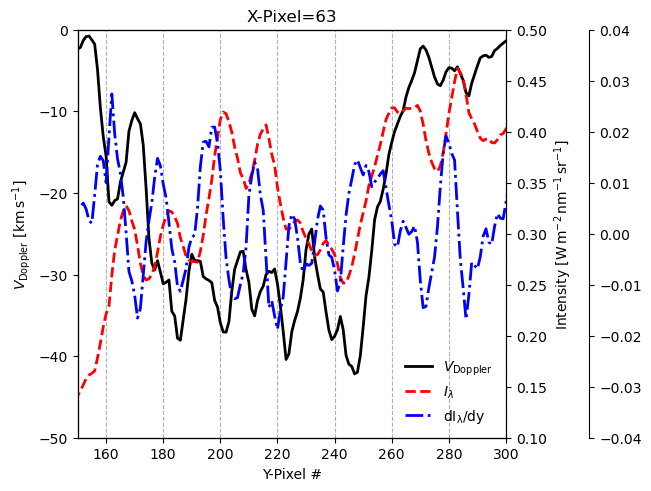

In [109]:
fig, ax_v = plt.subplots(layout='constrained')
ln1, = ax_v.plot(saffron_NeVIII_con06_velocity_map.data[:,63], color='black', lw=2, label=r'$V_{\rm Doppler}$')
ax_i = ax_v.twinx()
ln2, = ax_i.plot(saffron_NeVIII_con06_intensity_map.data[:,63], color='red', ls='--', lw=2, label=r'$I_\lambda$')
ax_i_grad = ax_i.twinx()
ln3, = ax_i_grad.plot(np.gradient(saffron_NeVIII_con06_intensity_map.data[:,63]), color='blue', ls='-.', lw=2, label=r'$\rm{d} I_\lambda/\rm{d}y$')
ax_i_grad.spines['right'].set_position(('outward', 60))  
ax_i.tick_params(axis='y',right=True,labelright=True,left=False,labelleft=False)
ax_i_grad.set_ylim([-0.04,0.04])
ax_v.set_xlim([150,300])
ax_v.set_ylim([-50,0])
ax_i.set_ylim([0.1,0.5])
ax_v.set_title('X-Pixel=63')

ax_v.set_xlabel('Y-Pixel #')
ax_v.set_ylabel(r'$V_{\rm Doppler}$ $[\rm km\,s^{-1}]$')
ax_i.set_ylabel(r'Intensity [$\rm W\,m^{-2}\,nm^{-1}\,sr^{-1}$]')
ax_v.legend([ln1, ln2, ln3], [ln1.get_label(), ln2.get_label(), ln3.get_label()],frameon=False,loc='lower right')
ax_v.grid(which='major', axis='x', linestyle='--')

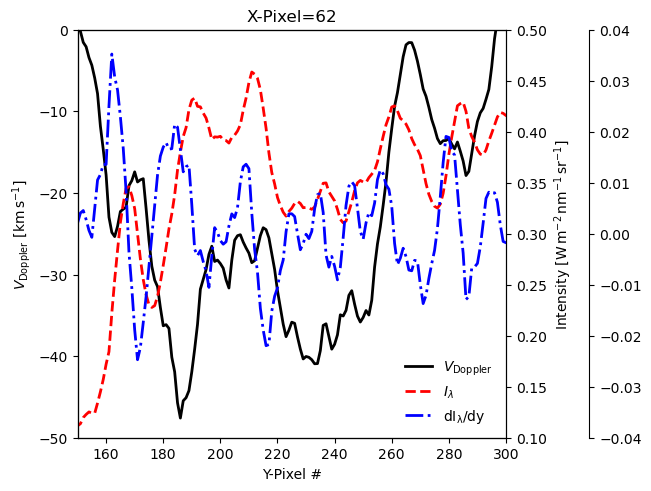

In [105]:
fig, ax_v = plt.subplots(layout='constrained')
ln1, = ax_v.plot(saffron_NeVIII_con06_velocity_map.data[:,62], color='black', lw=2, label=r'$V_{\rm Doppler}$')
ax_i = ax_v.twinx()
ln2, = ax_i.plot(saffron_NeVIII_con06_intensity_map.data[:,62], color='red', ls='--', lw=2, label=r'$I_\lambda$')
ax_i_grad = ax_i.twinx()
ln3, = ax_i_grad.plot(np.gradient(saffron_NeVIII_con06_intensity_map.data[:,62]), color='blue', ls='-.', lw=2, label=r'$\rm{d} I_\lambda/\rm{d}y$')
ax_i_grad.spines['right'].set_position(('outward', 60))
ax_i.tick_params(axis='y',right=True,labelright=True,left=False,labelleft=False)
ax_i_grad.set_ylim([-0.04,0.04])
ax_v.set_xlim([150,300])
ax_v.set_ylim([-50,0])
ax_i.set_ylim([0.1,0.5])
ax_v.set_title('X-Pixel=62')

ax_v.set_xlabel('Y-Pixel #')
ax_v.set_ylabel(r'$V_{\rm Doppler}$ $[\rm km\,s^{-1}]$')
ax_i.set_ylabel(r'Intensity [$\rm W\,m^{-2}\,nm^{-1}\,sr^{-1}$]')
ax_v.legend([ln1, ln2, ln3], [ln1.get_label(), ln2.get_label(), ln3.get_label()],frameon=False,loc='lower right')

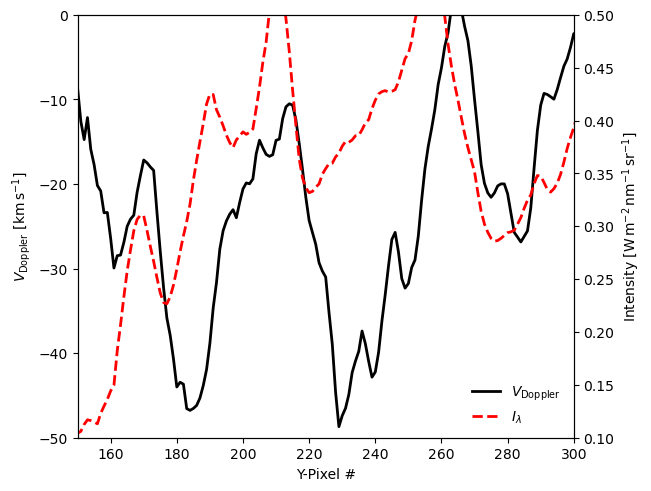

In [69]:
fig, ax_v = plt.subplots(layout='constrained')
ln1, = ax_v.plot(saffron_NeVIII_con06_velocity_map.data[:,61], color='black', lw=2, label=r'$V_{\rm Doppler}$')
ax_i = ax_v.twinx()
ln2, = ax_i.plot(saffron_NeVIII_con06_intensity_map.data[:,61], color='red', ls='--', lw=2, label=r'$I_\lambda$')
ax_v.set_xlim([150,300])
ax_v.set_ylim([-50,0])
ax_i.set_ylim([0.1,0.5])

ax_v.set_xlabel('Y-Pixel #')
ax_v.set_ylabel(r'$V_{\rm Doppler}$ $[\rm km\,s^{-1}]$')
ax_i.set_ylabel(r'Intensity [$\rm W\,m^{-2}\,nm^{-1}\,sr^{-1}$]')
ax_v.legend([ln1, ln2], [ln1.get_label(), ln2.get_label()],frameon=False,loc='lower right')

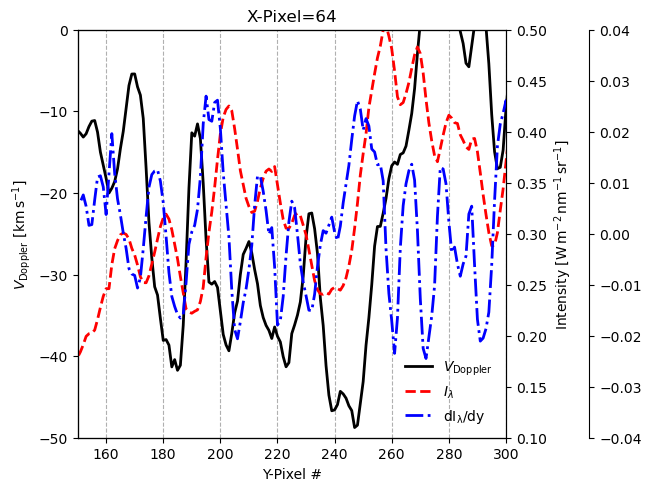

In [110]:
fig, ax_v = plt.subplots(layout='constrained')
ln1, = ax_v.plot(saffron_NeVIII_con06_velocity_map.data[:,64], color='black', lw=2, label=r'$V_{\rm Doppler}$')
ax_i = ax_v.twinx()
ln2, = ax_i.plot(saffron_NeVIII_con06_intensity_map.data[:,64], color='red', ls='--', lw=2, label=r'$I_\lambda$')
ax_i_grad = ax_i.twinx()
ln3, = ax_i_grad.plot(np.gradient(saffron_NeVIII_con06_intensity_map.data[:,64]), color='blue', ls='-.', lw=2, label=r'$\rm{d} I_\lambda/\rm{d}y$')
ax_i.tick_params(axis='y',right=True,labelright=True,left=False,labelleft=False)
ax_i_grad.spines['right'].set_position(('outward', 60))
ax_i_grad.set_ylim([-0.04,0.04])
ax_v.set_xlim([150,300])
ax_v.set_ylim([-50,0])
ax_i.set_ylim([0.1,0.5])
ax_v.set_title('X-Pixel=64')

ax_v.set_xlabel('Y-Pixel #')
ax_v.set_ylabel(r'$V_{\rm Doppler}$ $[\rm km\,s^{-1}]$')
ax_i.set_ylabel(r'Intensity [$\rm W\,m^{-2}\,nm^{-1}\,sr^{-1}$]')
ax_v.legend([ln1, ln2, ln3], [ln1.get_label(), ln2.get_label(), ln3.get_label()],frameon=False,loc='lower right')
ax_v.grid(which='major', axis='x', linestyle='--')

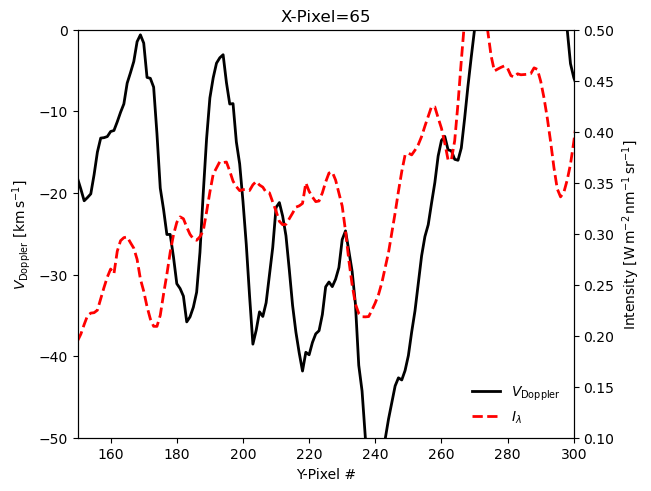

In [87]:
fig, ax_v = plt.subplots(layout='constrained')
ln1, = ax_v.plot(saffron_NeVIII_con06_velocity_map.data[:,65], color='black', lw=2, label=r'$V_{\rm Doppler}$')
ax_i = ax_v.twinx()
ln2, = ax_i.plot(saffron_NeVIII_con06_intensity_map.data[:,65], color='red', ls='--', lw=2, label=r'$I_\lambda$')
ax_v.set_xlim([150,300])
ax_v.set_ylim([-50,0])
ax_i.set_ylim([0.1,0.5])
ax_v.set_title('X-Pixel=65')

ax_v.set_xlabel('Y-Pixel #')
ax_v.set_ylabel(r'$V_{\rm Doppler}$ $[\rm km\,s^{-1}]$')
ax_i.set_ylabel(r'Intensity [$\rm W\,m^{-2}\,nm^{-1}\,sr^{-1}$]')
ax_v.legend([ln1, ln2], [ln1.get_label(), ln2.get_label()],frameon=False,loc='lower right')

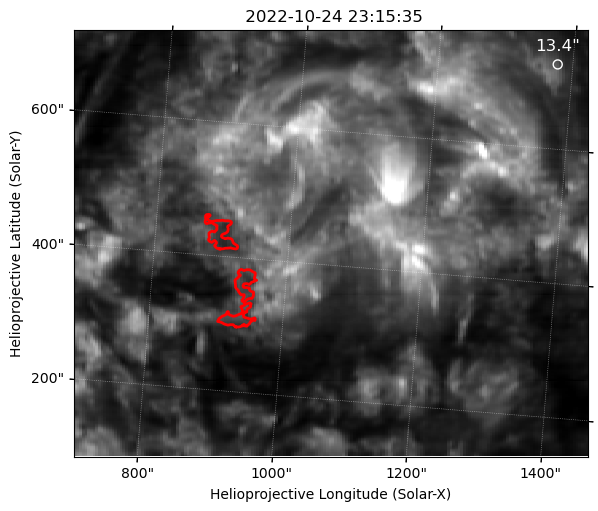

In [9]:
fig = plt.figure(figsize=(7, 5),layout='constrained')
ax = fig.add_subplot(111, projection=saffron_NeVIII_con06_intensity_map)
saffron_NeVIII_con06_intensity_map.plot(axes=ax)

for ii in cs_selected_index:
    ax.plot(*cs.allsegs[0][ii].T, color='red', lw=2)

add_psf_scale_circle(ax, '13.4"', (6.7*u.arcsec).to(u.deg), spherical_circle=True, edgecolor='white',
                      facecolor='none', fontsize=12, loc='upper right', font_color='white')

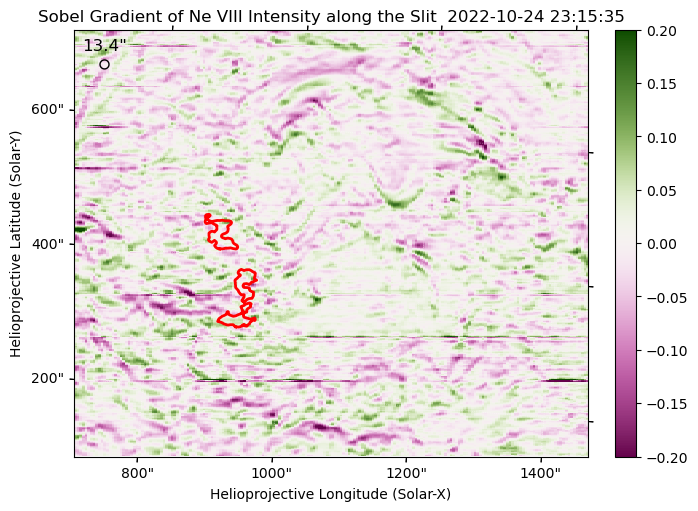

In [63]:
saffron_NeVIII_con06_intensity_grad_map = sunpy.map.Map(np.gradient(saffron_NeVIII_con06_intensity_map.data, axis=0)/saffron_NeVIII_con06_intensity_map.data, 
                                                        saffron_NeVIII_con06_intensity_map.meta)
saffron_NeVIII_con06_intensity_grad_map.plot_settings['aspect'] = \
    saffron_NeVIII_con06_intensity_grad_map.scale.axis2/saffron_NeVIII_con06_intensity_grad_map.scale.axis1
saffron_NeVIII_con06_intensity_grad_map.plot_settings['norm'] = ImageNormalize(vmin=-0.2,vmax=0.2)
saffron_NeVIII_con06_intensity_grad_map.plot_settings['cmap'] = cmcm.bam

fig = plt.figure(figsize=(7, 5),layout='constrained')
ax = fig.add_subplot(111, projection=saffron_NeVIII_con06_intensity_grad_map)
saffron_NeVIII_con06_intensity_grad_map.plot(axes=ax)
plt.colorbar()

for ii in cs_selected_index:
    ax.plot(*cs.allsegs[0][ii].T, color='red', lw=2)

ax.set_title(f'Sobel Gradient of Ne VIII Intensity along the Slit {saffron_NeVIII_con06_intensity_grad_map.name}')

add_psf_scale_circle(ax, '13.4"', (6.7*u.arcsec).to(u.deg), spherical_circle=True, edgecolor='black', facecolor='none', fontsize=12, loc='upper left')

In [64]:
cs_skycoords = [saffron_NeVIII_con06_intensity_map.pixel_to_world(cs.allsegs[0][cs_index][:-1,0]*u.pix,cs.allsegs[0][cs_index][:-1,1]*u.pix) \
                for cs_index in cs_selected_index]
cs_regions = [PolygonSkyRegion(vertices=cs_skycoord) for cs_skycoord in cs_skycoords]
cs_region_points = [np.where(cs_region.contains(sunpy.map.all_coordinates_from_map(saffron_NeVIII_con06_intensity_map), 
                                                saffron_NeVIII_con06_intensity_map.wcs)) for cs_region in cs_regions]

NeVIII_con06_intensity_cs_regions = [saffron_NeVIII_con06_intensity_map.data[point] for point in cs_region_points]
OIII_con06_intensity_cs_regions = [saffron_OIII_con06_intensity_map.data[point] for point in cs_region_points]
NIV_con06_intensity_cs_regions = [saffron_NIV_con06_intensity_map.data[point] for point in cs_region_points]
OIV_con06_intensity_cs_regions = [saffron_OIV_con06_intensity_map.data[point] for point in cs_region_points]
SV_con06_intensity_cs_regions = [saffron_SV_con06_intensity_map.data[point] for point in cs_region_points]
NIII_con06_intensity_cs_regions = [saffron_NIII_con06_intensity_map.data[point] for point in cs_region_points]
MgIX_con06_intensity_cs_regions = [saffron_MgIX_con06_intensity_map.data[point] for point in cs_region_points]
NeVIII_con06_velocity_cs_regions = [saffron_NeVIII_con06_velocity_map.data[point] for point in cs_region_points]
NIV_con06_velocity_cs_regions = [saffron_NIV_con06_velocity_map.data[point] for point in cs_region_points]

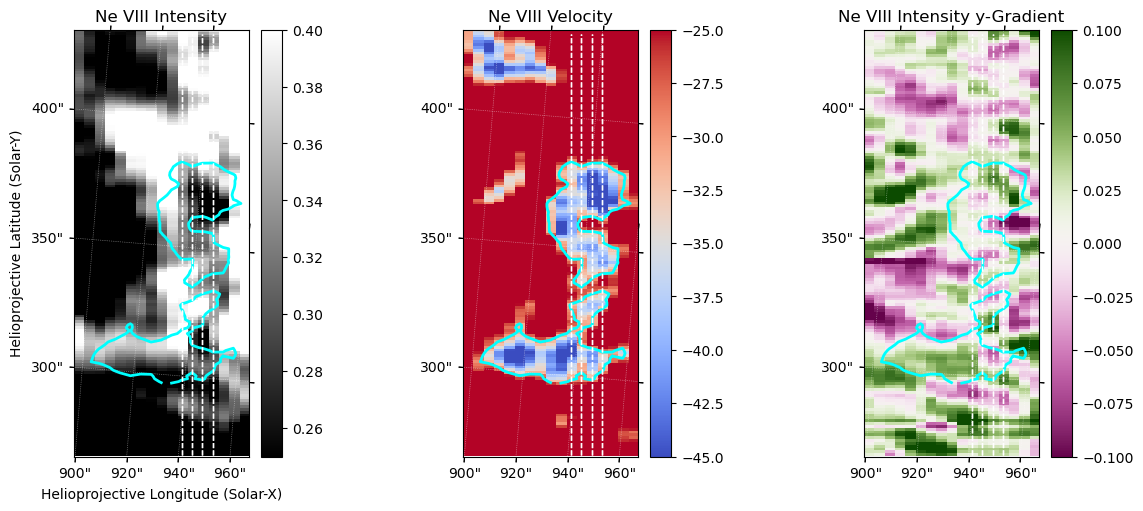

In [86]:
saffron_NeVIII_con06_intensity_map_crop = saffron_NeVIII_con06_intensity_map.submap([52,150]*u.pix, top_right=[68,300]*u.pix)
saffron_NeVIII_con06_velocity_map_crop = saffron_NeVIII_con06_velocity_map.submap([52,150]*u.pix, top_right=[68,300]*u.pix)
saffron_NeVIII_con06_intensity_grad_map_crop = saffron_NeVIII_con06_intensity_grad_map.submap([52,150]*u.pix, top_right=[68,300]*u.pix)

fig = plt.figure(figsize=(12, 5),layout='constrained')

ax1 = fig.add_subplot(131, projection=saffron_NeVIII_con06_intensity_map_crop,)
saffron_NeVIII_con06_intensity_map_crop.plot(axes=ax1,
                                             norm=ImageNormalize(vmin=0.25,
                                            vmax=0.4,
                                            stretch=LinearStretch()))
plt.colorbar(ax=ax1)
ax1.set_title('Ne VIII Intensity')

ax2 = fig.add_subplot(132, projection=saffron_NeVIII_con06_velocity_map_crop)
saffron_NeVIII_con06_velocity_map_crop.plot(axes=ax2, norm=ImageNormalize(vmin=-45,vmax=-25), cmap='coolwarm')
plt.colorbar(ax=ax2)
ax2.set_title('Ne VIII Velocity')

ax3 = fig.add_subplot(133, projection=saffron_NeVIII_con06_intensity_grad_map_crop)
saffron_NeVIII_con06_intensity_grad_map_crop.plot(axes=ax3,
                                                  norm=ImageNormalize(vmin=-0.1,
                                                                      vmax=0.1,))
plt.colorbar(ax=ax3)
ax3.set_title('Ne VIII Intensity y-Gradient')

for ax_ in (ax1, ax2, ax3):
    for region in cs_regions[0:2]:
        ax_.plot_coord(region.vertices, color='cyan', lw=2, alpha=1)
        ax_.plot_coord(saffron_NeVIII_con06_intensity_map.wcs.pixel_to_world(63*np.ones(150), np.arange(150,300)), color='white', ls='--', lw=1)
        ax_.plot_coord(saffron_NeVIII_con06_intensity_map.wcs.pixel_to_world(62*np.ones(150), np.arange(150,300)), color='white', ls='--', lw=1)
        ax_.plot_coord(saffron_NeVIII_con06_intensity_map.wcs.pixel_to_world(64*np.ones(150), np.arange(150,300)), color='white', ls='--', lw=1)
        ax_.plot_coord(saffron_NeVIII_con06_intensity_map.wcs.pixel_to_world(65*np.ones(150), np.arange(150,300)), color='white', ls='--', lw=1)

for ax_ in (ax2,ax3):
    ax_.set_xlabel(' ')
    ax_.set_ylabel(' ')

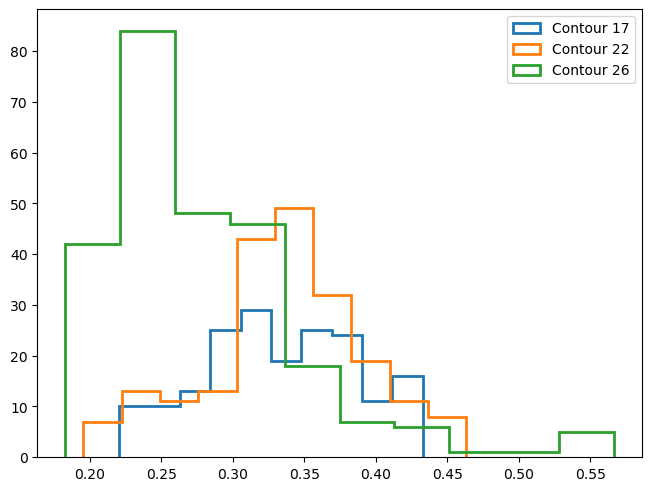

In [12]:
fig, ax = plt.subplots(layout='constrained')
for cs_int, cs_index in zip(NeVIII_con06_intensity_cs_regions, cs_selected_index):
    ax.hist(cs_int, bins=10, histtype='step', lw=2, label=f'Contour {cs_index}')
ax.legend()

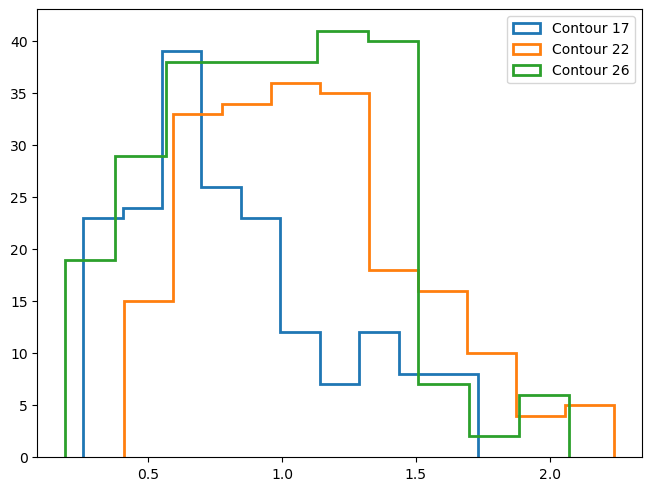

In [13]:
fig, ax = plt.subplots(layout='constrained')
for cs_int, cs_index in zip(OIII_con06_intensity_cs_regions, cs_selected_index):
    ax.hist(cs_int, bins=10, histtype='step', lw=2, label=f'Contour {cs_index}')
ax.legend()

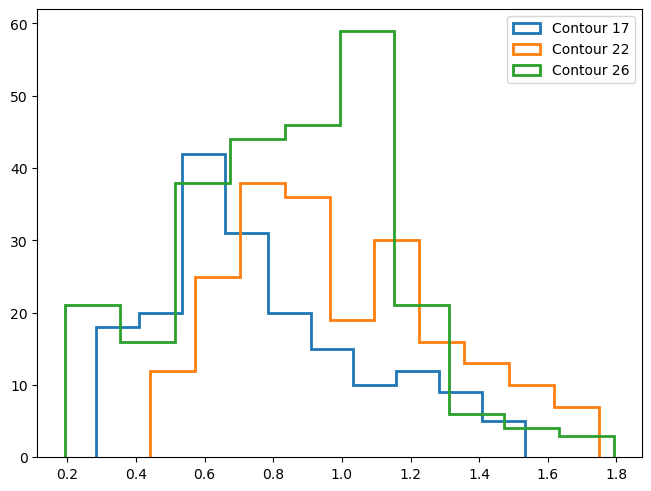

In [14]:
fig, ax = plt.subplots(layout='constrained')
for cs_int, cs_index in zip(NIV_con06_intensity_cs_regions, cs_selected_index):
    ax.hist(cs_int, bins=10, histtype='step', lw=2, label=f'Contour {cs_index}')
ax.legend()

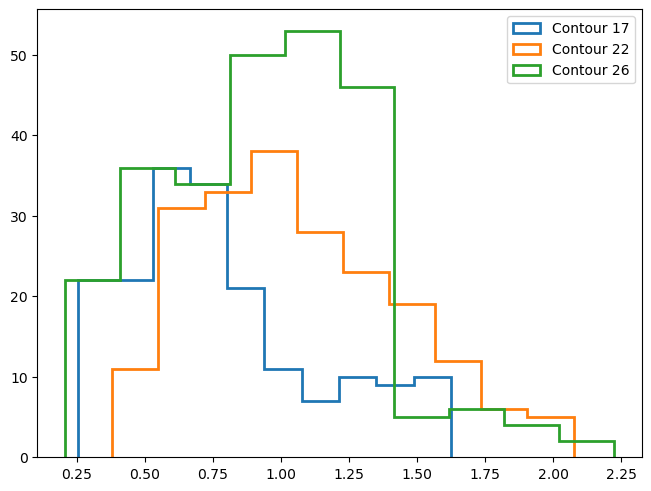

In [15]:
fig, ax = plt.subplots(layout='constrained')
for cs_int, cs_index in zip(OIV_con06_intensity_cs_regions, cs_selected_index):
    ax.hist(cs_int, bins=10, histtype='step', lw=2, label=f'Contour {cs_index}')
ax.legend()

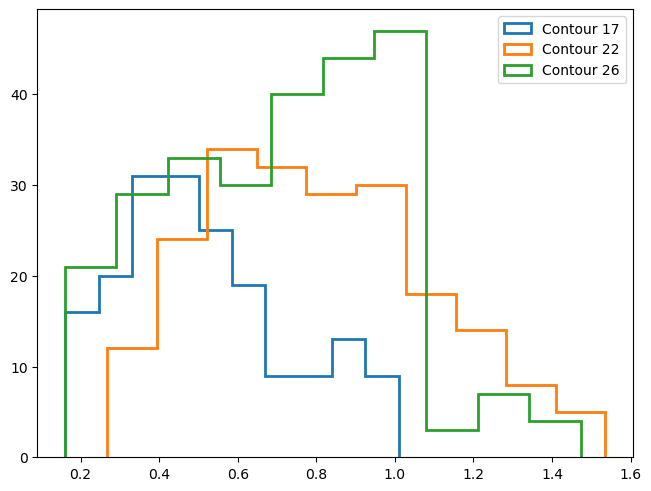

In [16]:
fig, ax = plt.subplots(layout='constrained')
for cs_int, cs_index in zip(SV_con06_intensity_cs_regions, cs_selected_index):
    ax.hist(cs_int, bins=10, histtype='step', lw=2, label=f'Contour {cs_index}')
ax.legend()

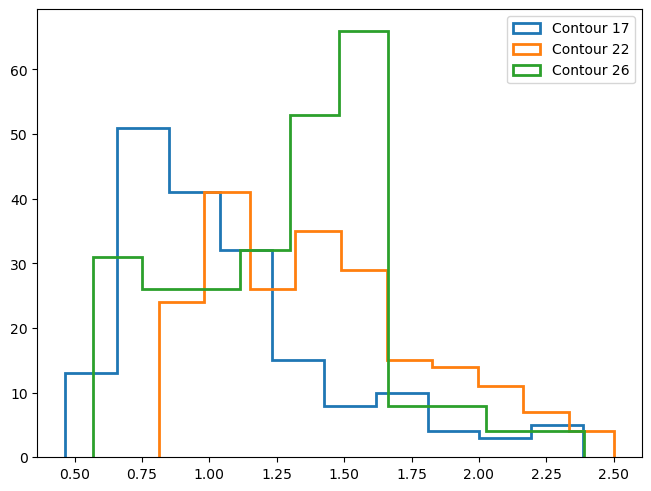

In [17]:
fig, ax = plt.subplots(layout='constrained')
for cs_int, cs_index in zip(NIII_con06_intensity_cs_regions, cs_selected_index):
    ax.hist(cs_int, bins=10, histtype='step', lw=2, label=f'Contour {cs_index}')
ax.legend()

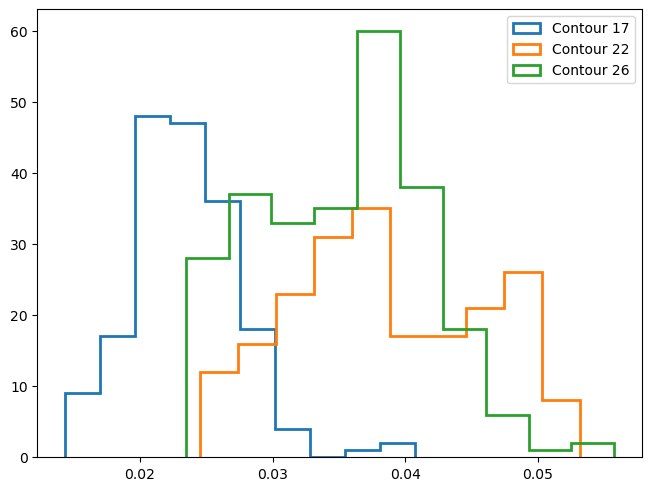

In [18]:
fig, ax = plt.subplots(layout='constrained')
for cs_int, cs_index in zip(MgIX_con06_intensity_cs_regions, cs_selected_index):
    ax.hist(cs_int, bins=10, histtype='step', lw=2, label=f'Contour {cs_index}')
ax.legend()